---
# Practical_exercise_7 , Methods 3, 2021, autumn semester <br>
## Author: Sigurd Fyhn Sørensen <br>
## Date: 15-11-21


# Exercises and objectives

1) Estimate bias and variance based on a true underlying function  
2) Fitting training data and applying it to test sets with and without regularization  

For each question and sub-question, please indicate one of the three following answers:  
    i. I understood what was required of me  
    ii. I understood what was required of me, but I did not know how to fulfil the requirement  
    iii. I did not understand what was required of me  


In [369]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt


# EXERCISE 1 - Estimate bias and variance based on a true underlying function  

We can express regression as $y = f(x) + \epsilon$ with $E[\epsilon] = 0$ and $var(\epsilon) = \sigma^2$ ($E$ means expected value)  
  
For a given point: $x_0$, we can decompose the expected prediction error , $E[(y_0 - \hat{f}(x_0))^2]$ into three parts - __bias__, __variance__ and __irreducible error__ (the first two together are the __reducible error__):

The expected prediction error is, which we also call the __Mean Squared Error__:  
$E[(y_0 - \hat{f}(x_0))^2] =  bias(\hat{f}(x_0))^2 + var(\hat{f}(x_0)) + \sigma^2$
  
where __bias__ is;
  
$bias(\hat{f}(x_0)) = E[\hat{f}(x_0)] - f(x_0)$

## 1) Create a function, $f(x)$ that squares its input. This is our __true__ function  
    i. generate data, $y$, based on an input range of [0, 6] with a spacing of 0.1. Call this $x$
    


In [370]:
def sqaure_input(x):
    x = x**2
    return(x)
x = np.arange(0,6,0.1)
y = sqaure_input(x)

    ii. add normally distributed noise to $y$ with $\sigma=5$ (set a seed to 7 `np.random.seed(7)`) to $y$ and call it $y_{noisy}$
    


In [371]:
np.random.seed(7)
noise = np.random.normal(loc = 0, scale = 5, size = len(y))
y_noise = y+noise

    iii. plot the true function and the generated points  


<function matplotlib.pyplot.show(close=None, block=None)>

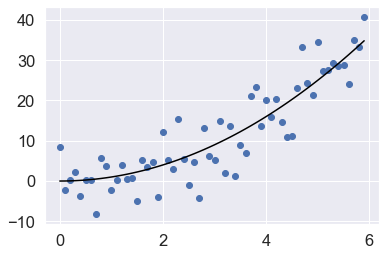

In [372]:
plt.scatter(x, y_noise, marker='o')
plt.plot(x, y, color = 'black')
plt.show

## 2) Fit a linear regression using `LinearRegression` from `sklearn.linear_model` based on $y_{noisy}$ and $x$ (see code chunk below associated with Exercise 1.2)  
    i. plot the fitted line (see the `.intercept_` and `.coef_` attributes of the `regressor` object) on top of the plot (from 1.1.iii)


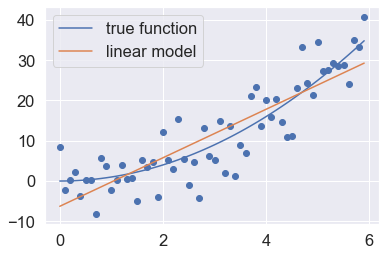

In [373]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

ones = np.ones(len(x))
X = np.stack( (ones, x), axis = 1 )

regr.fit(X,y_noise)
y_pred = regr.predict(X)

plt.scatter(x, y_noise, marker='o')
plt.plot(x, y, label ='true function')
plt.plot(x ,y_pred, label ='linear model')
plt.legend()
plt.show()


    ii. now run the code chunk below associated with Exercise 1.2.ii - what does X_quadratic amount to?


In [374]:
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(degree= 2) #sets degree to transform x by. 
X_quadratic = quadratic.fit_transform(x.reshape(-1,1)) #Turns x intro a quadratic expression for lM()
regr2 = LinearRegression() #sets regression
regr2.fit(X_quadratic, y_noise) #train on data
print(regr2.coef_) #gives coeff


[ 0.         -1.37003449  1.25291684]


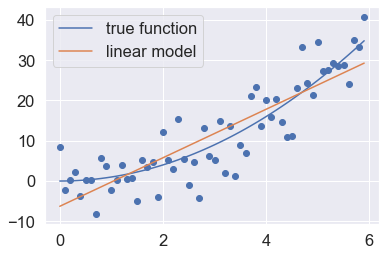

In [375]:
plt.scatter(x, y_noise, marker='o')
plt.plot(x, y, label ='true function')
plt.plot(x ,y_pred, label ='linear model')
plt.legend()
plt.show()

    iii. do a quadratic and a fifth order fit as well and plot them (on top of the plot from 1.2.i)


In [376]:
y_pred_quad = regr2.predict(X_quadratic)
print(y_pred_quad) #Prints out y-hat. 

[ 0.8784674   0.75399312  0.65457718  0.58021957  0.5309203   0.50667936
  0.50749677  0.5333725   0.58430658  0.66029899  0.76134974  0.88745883
  1.03862625  1.21485201  1.41613611  1.64247854  1.89387931  2.17033842
  2.47185586  2.79843164  3.15006576  3.52675821  3.928509    4.35531813
  4.80718559  5.28411139  5.78609553  6.313138    6.86523881  7.44239796
  8.04461544  8.67189126  9.32422542 10.00161791 10.70406874 11.43157791
 12.18414541 12.96177125 13.76445543 14.59219794 15.4449988  16.32285798
 17.22577551 18.15375137 19.10678557 20.0848781  21.08802897 22.11623818
 23.16950572 24.24783161 25.35121582 26.47965838 27.63315927 28.8117185
 30.01533606 31.24401196 32.4977462  33.77653878 35.08038969 36.40929894]


In [377]:
regr3 = LinearRegression()
fifth_order = PolynomialFeatures(degree= 5) #sets degree to transform x by. 
X_fifth_order = fifth_order.fit_transform(x.reshape(-1,1)) #Turns x intro a quadratic expression for lM()
regr3.fit(X_fifth_order, y_noise) #train on data
print(regr3.coef_)

y_fifth_order_hat = regr3.predict(X_fifth_order)

[ 0.         -9.80969578 10.37624034 -3.89544073  0.71839193 -0.04777546]


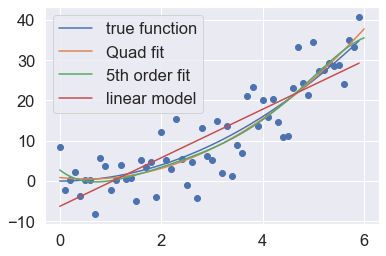

Quad fit:
        2
1.253 x - 1.37 x + 0.8785
5th order fit:
           5          4         3         2
-0.04778 x + 0.7184 x - 3.895 x + 10.38 x - 9.81 x + 2.747


In [378]:
#Quad fit
mymodel = np.poly1d(np.polyfit(x,y_noise,2))
myline = np.linspace(0,6,100)
#5th polynomial fit
mymodel2 = np.poly1d(np.polyfit(x,y_noise,5))
myline2 = np.linspace(0,6,100)



plt.scatter(x, y_noise, marker='o')
plt.plot(x, y, label ='true function')
plt.plot(myline, mymodel(myline), label = 'Quad fit')
plt.plot(myline2, mymodel2(myline2), label ='5th order fit')
plt.plot(x ,y_pred, label ='linear model')
plt.legend()
plt.show()

print('Quad fit:\n',mymodel)
print('5th order fit:\n', mymodel2)

## 3) Simulate 100 samples, each with sample size `len(x)` with $\sigma=5$ normally distributed noise added on top of the true function    
    i. do linear, quadratic and fifth-order fits for each of the 100 samples  


In [379]:
def simulate(x):
    y = sqaure_input(x)
    noise = np.random.normal(loc = 0, scale = 5, size = len(y))
    y_noise = y + noise 
    return (y_noise, y)   

def lin_reg(x,y):
    xm = x.reshape(-1,1)
    regr = LinearRegression()
    regr.fit(xm,y_noise)
    y_pred = regr.predict(xm)
    return y_pred

def quad_reg(x,y):
    #Quad fit
    mymodel = np.poly1d(np.polyfit(x,y_noise,2))
    myline = np.linspace(0,6,60)
    return (mymodel, myline)

def fifth_req(x,y):
    #5th polynomial fit
    mymodel2 = np.poly1d(np.polyfit(x,y_noise,5))
    myline2 = np.linspace(0,6,60)
    return (mymodel2, mymodel2)

def plot_all(myline, mymodel, myline2, mymodel2, y_pred, x, y):
    plt.scatter(x, y, marker='o')
    plt.plot(x, y, label ='true function')
    plt.plot(myline, mymodel(myline), label = 'Quad fit')
    plt.plot(myline2, mymodel2(myline2), label ='5th order fit')
    plt.plot(x ,y_pred, label ='linear model')
    plt.legend()
    plt.show()





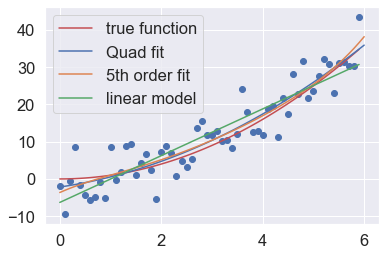

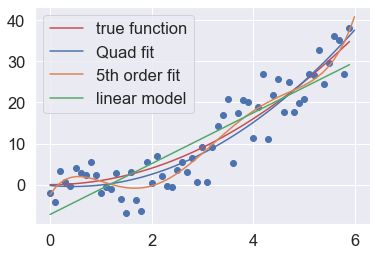

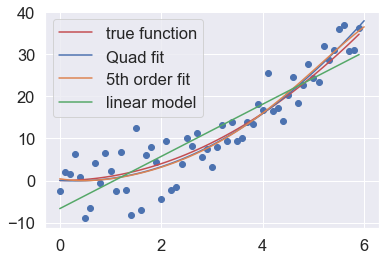

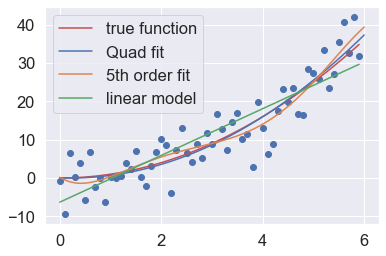

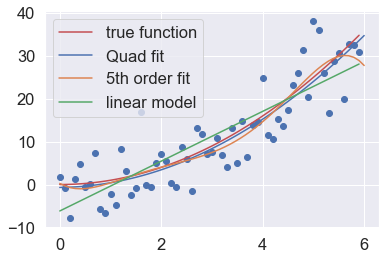

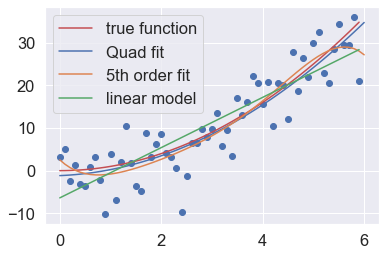

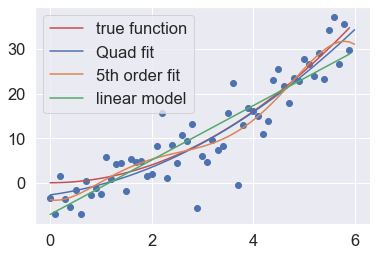

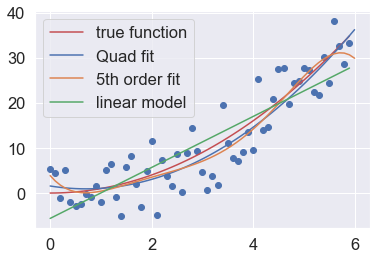

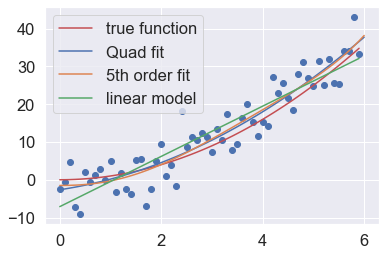

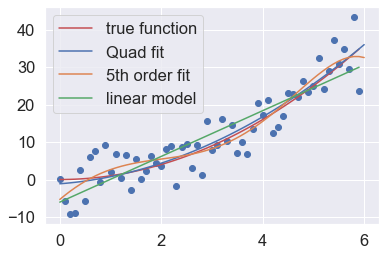

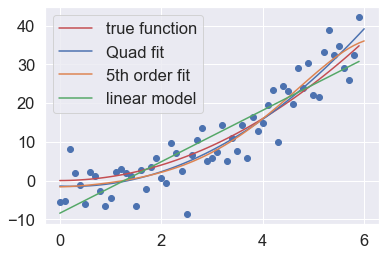

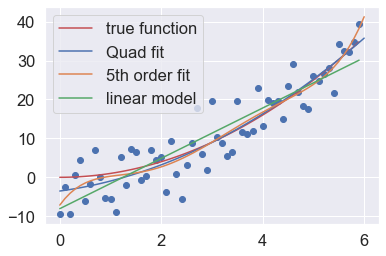

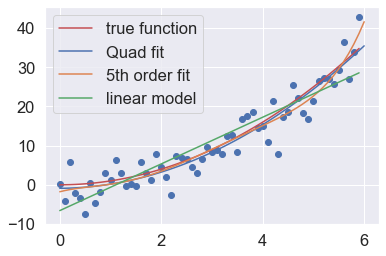

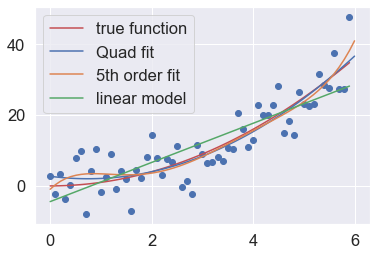

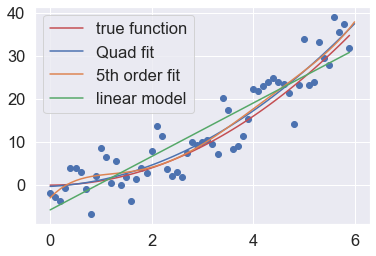

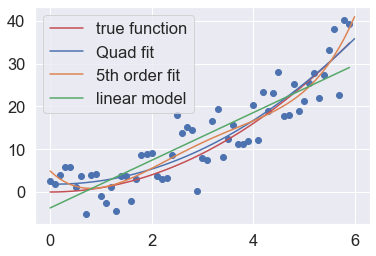

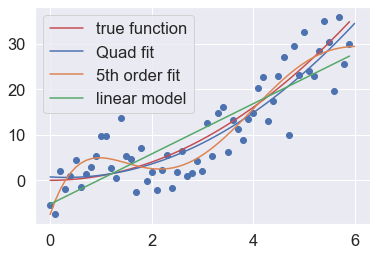

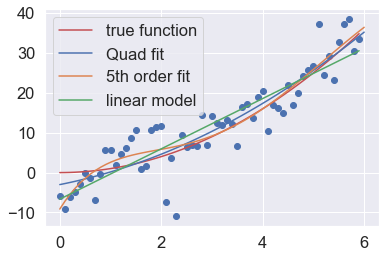

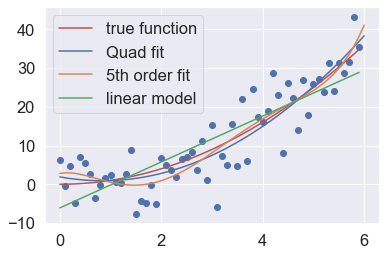

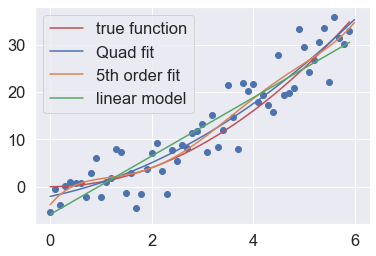

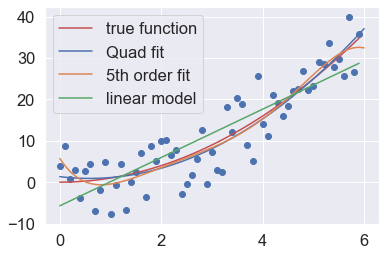

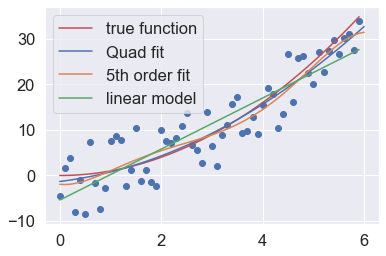

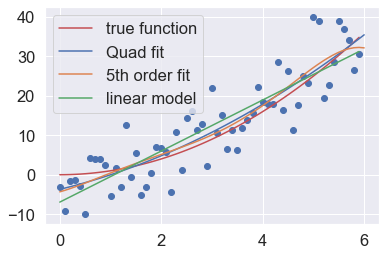

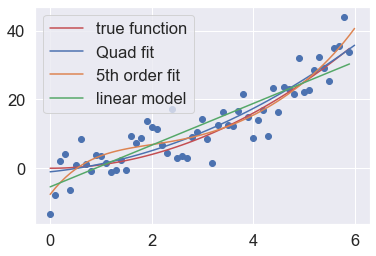

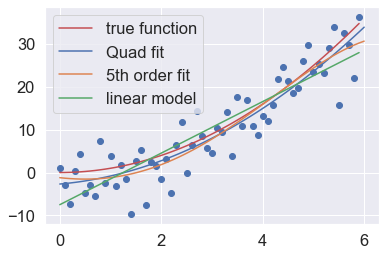

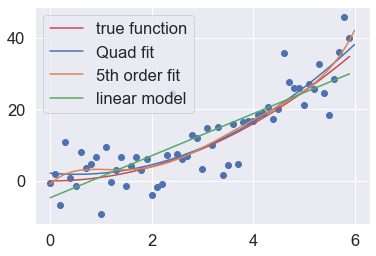

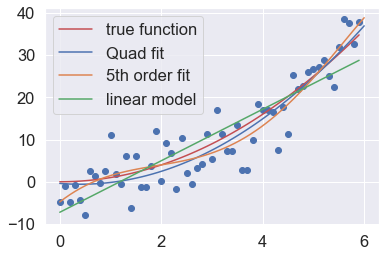

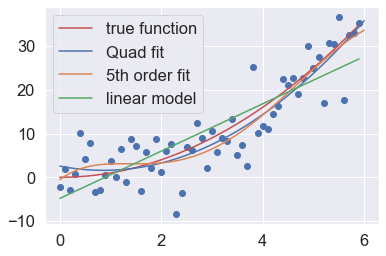

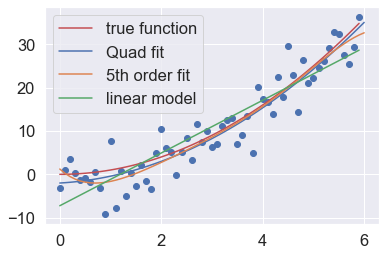

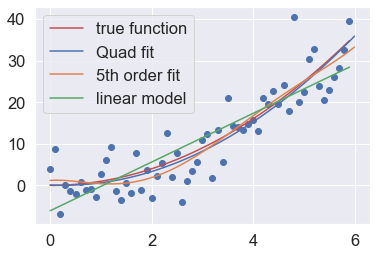

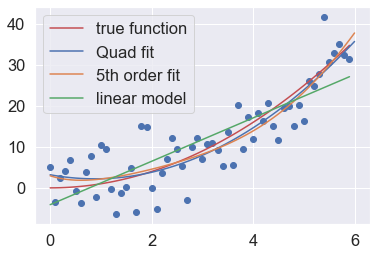

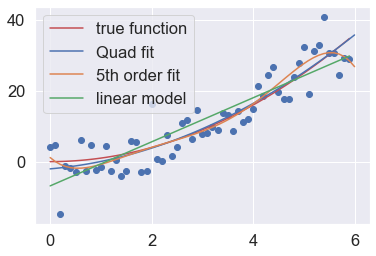

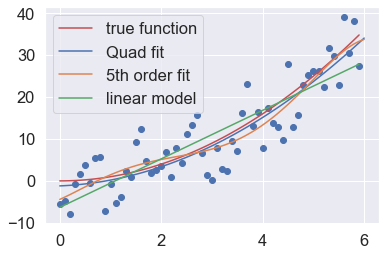

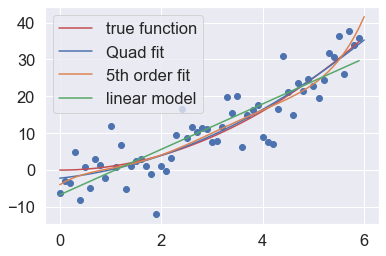

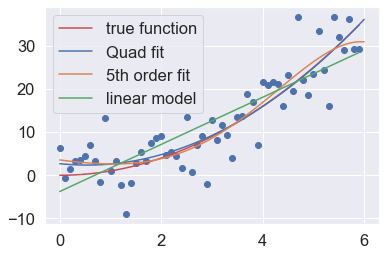

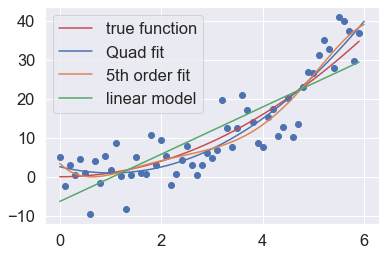

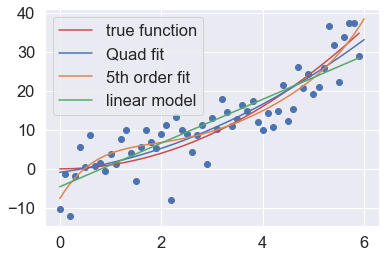

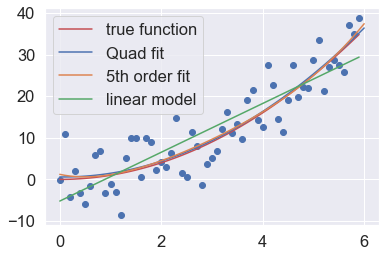

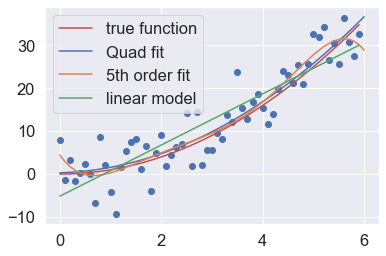

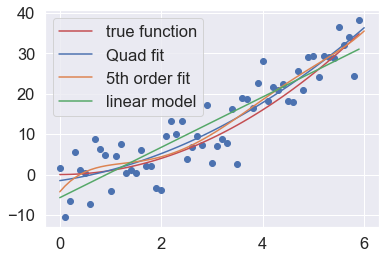

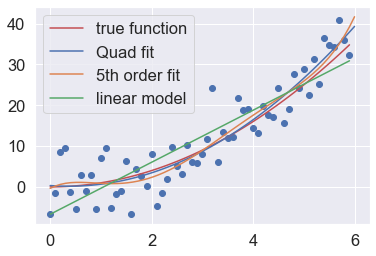

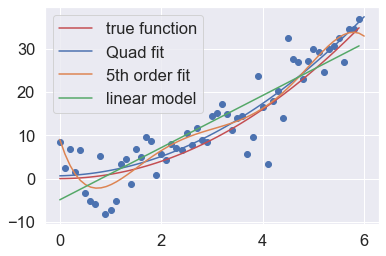

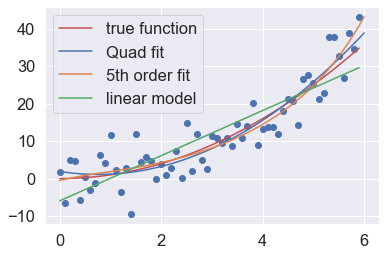

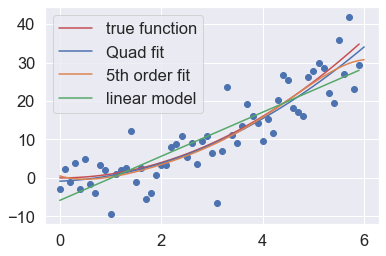

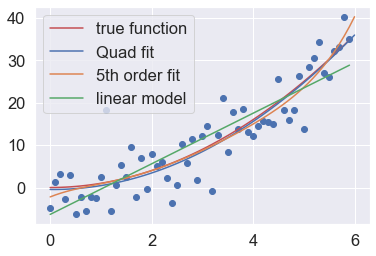

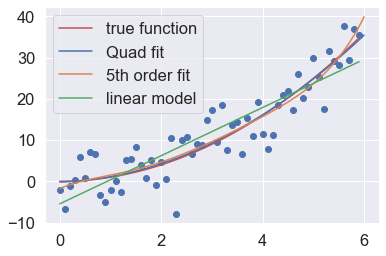

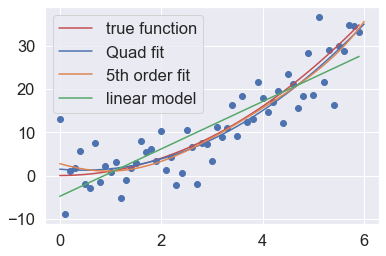

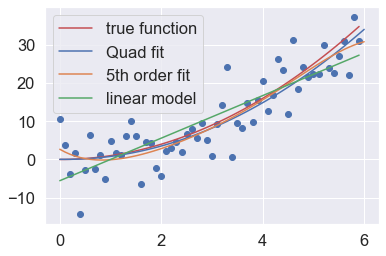

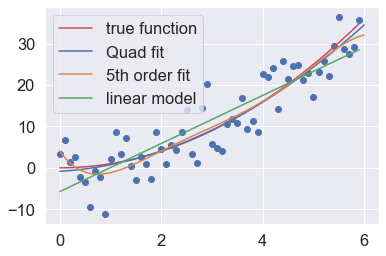

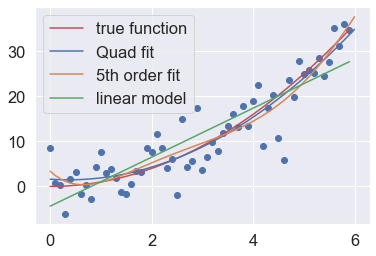

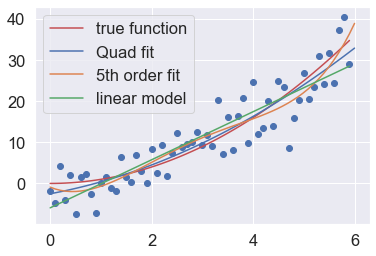

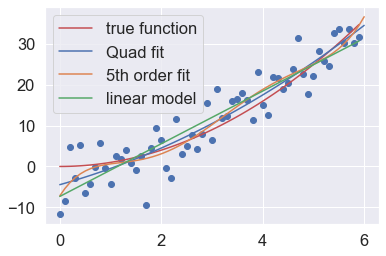

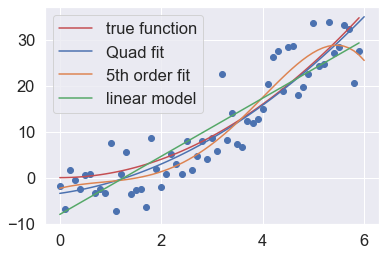

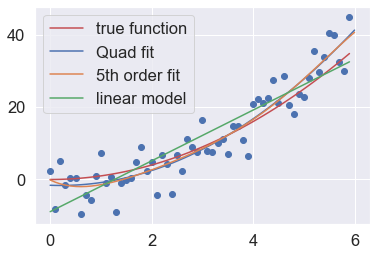

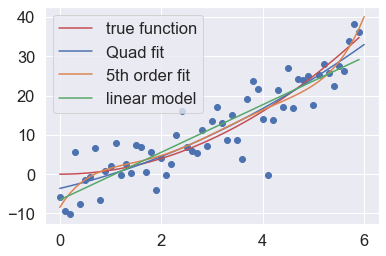

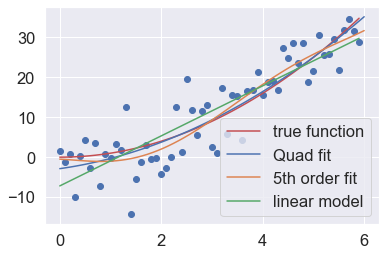

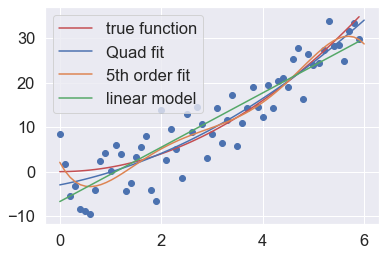

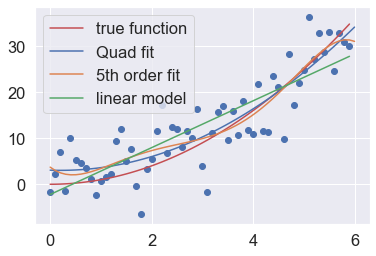

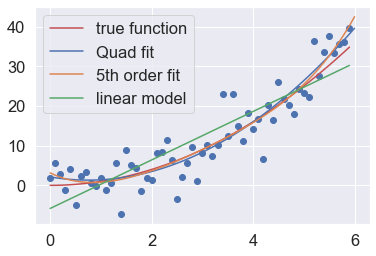

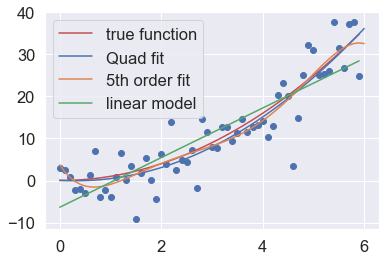

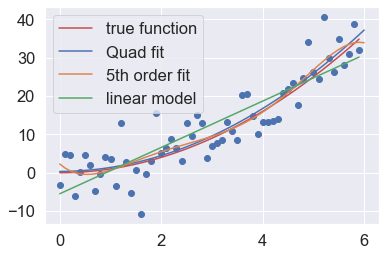

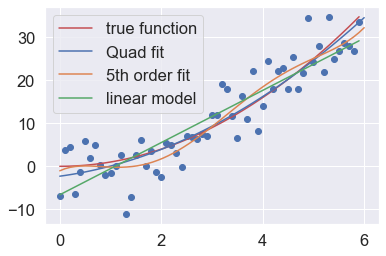

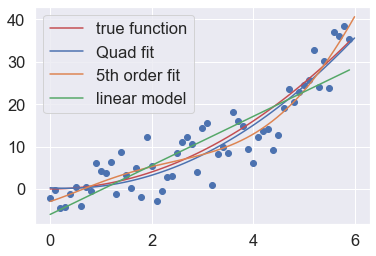

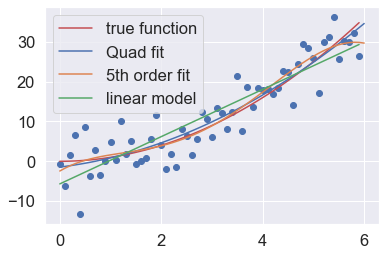

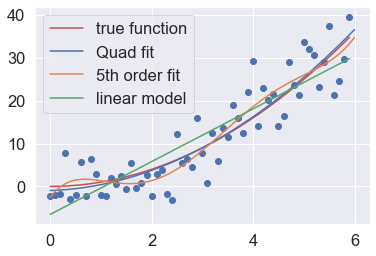

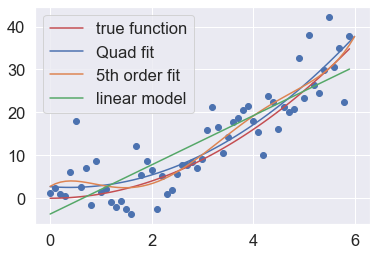

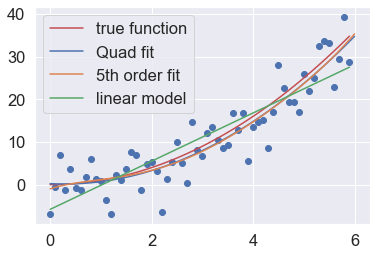

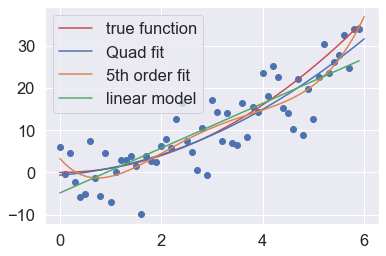

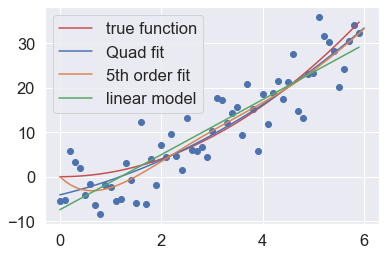

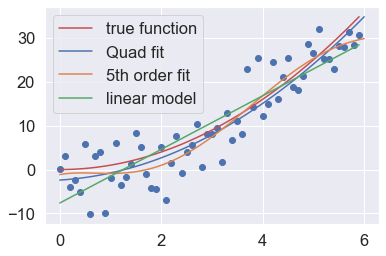

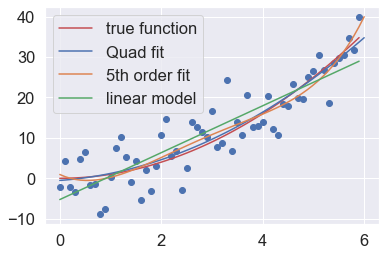

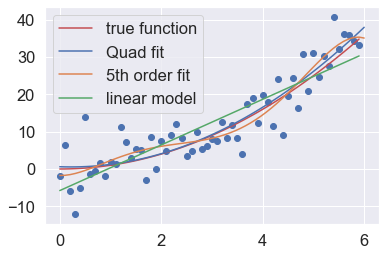

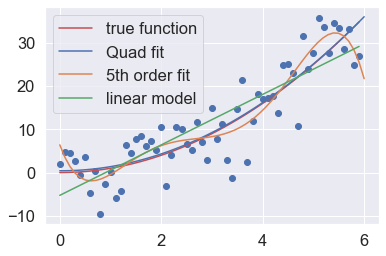

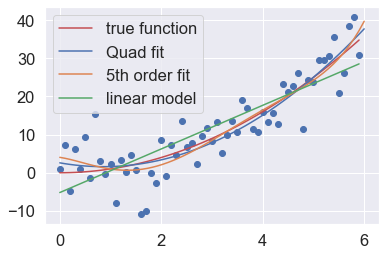

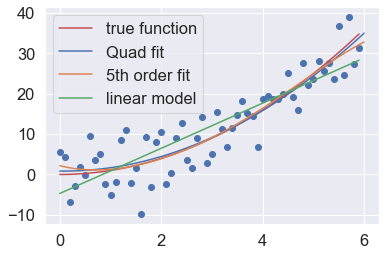

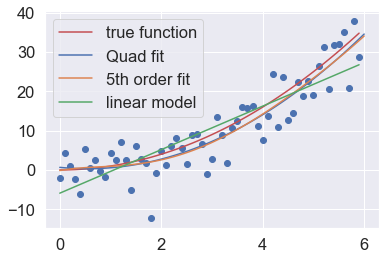

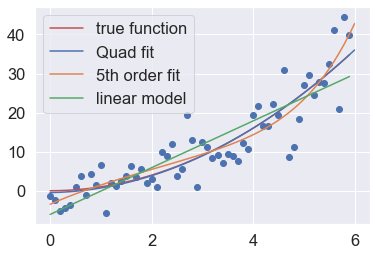

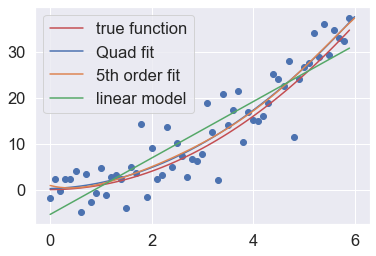

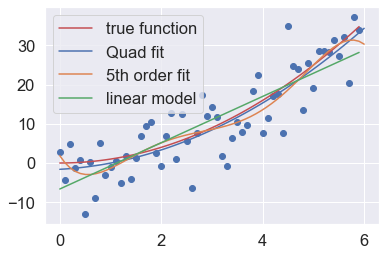

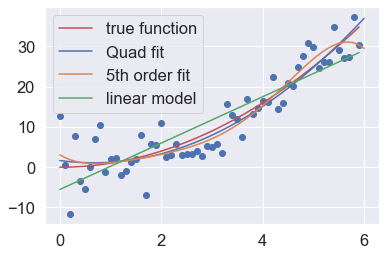

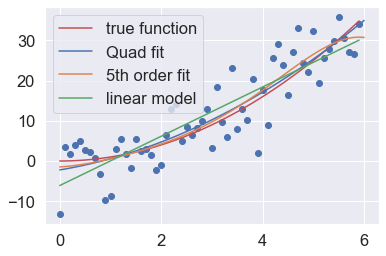

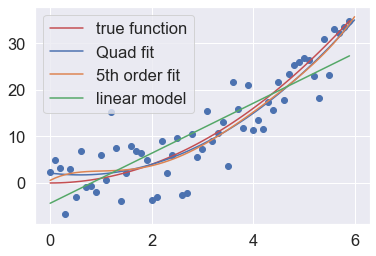

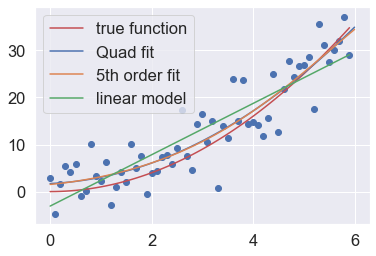

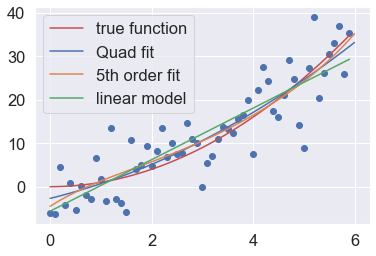

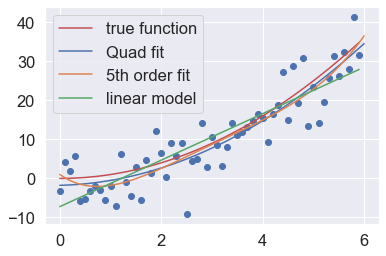

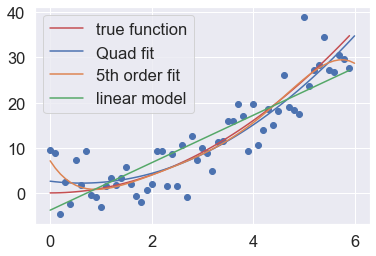

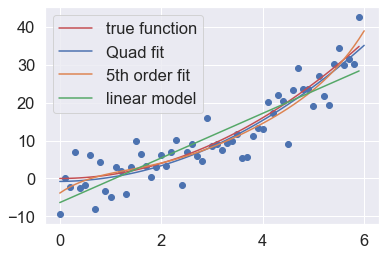

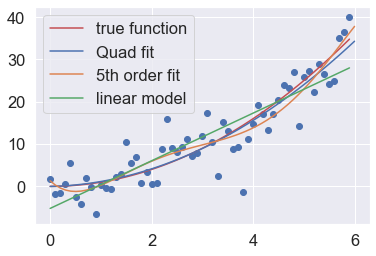

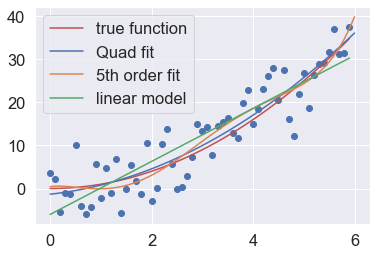

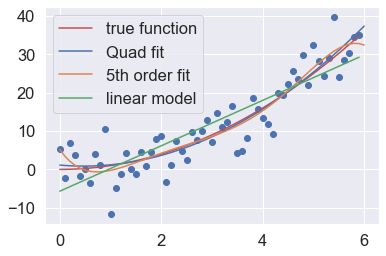

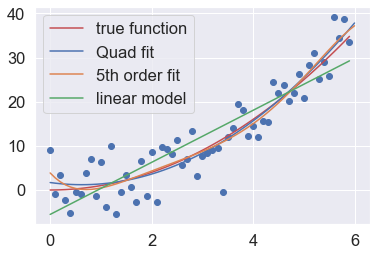

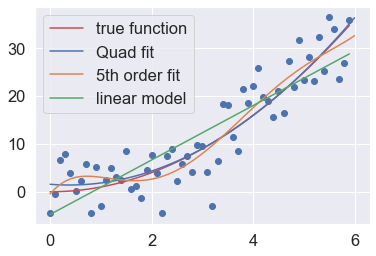

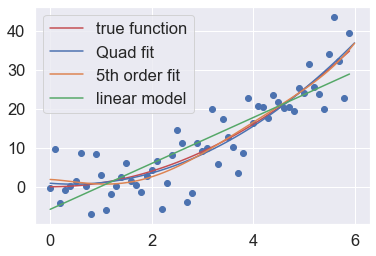

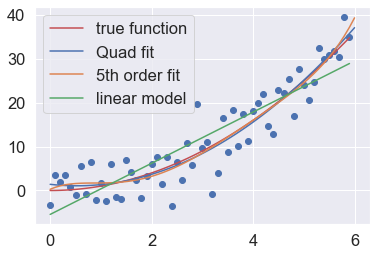

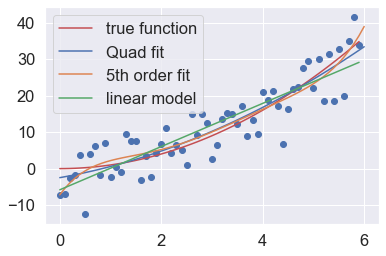

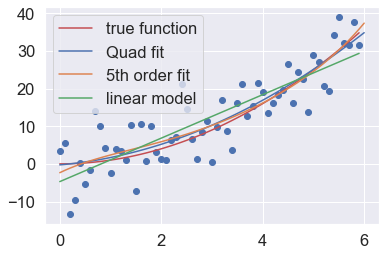

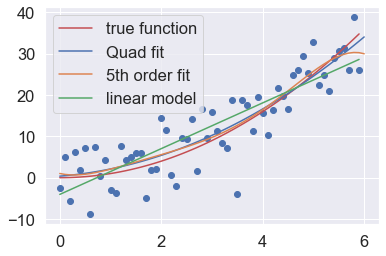

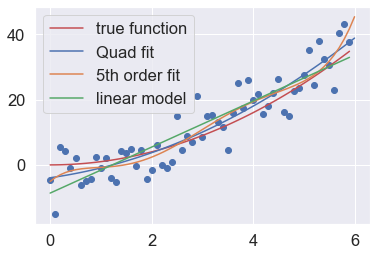

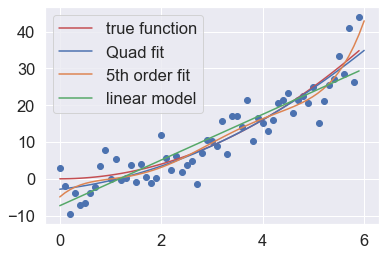

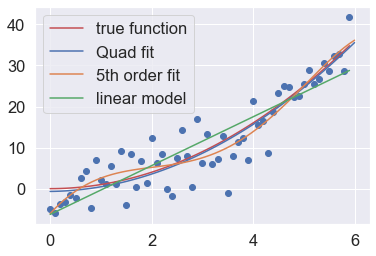

In [380]:
for i in np.arange(100):
    x = np.arange(0,6,0.1) #Make X
    y_noise, y = simulate(x) #Calc y and y_noise
    y_pred = lin_reg(x,y_noise) #Lin req
    #Quad fit
    mymodel = np.poly1d(np.polyfit(x,y_noise,2))
    myline = np.linspace(0,6,60)
    #5th polynomial fit
    mymodel2 = np.poly1d(np.polyfit(x,y_noise,5))
    myline2 = np.linspace(0,6,60)
    #Plotting
    plt.scatter(x, y_noise, marker='o')
    plt.plot(x, y, '-r', label ='true function')
    plt.plot(myline, mymodel(myline), label = 'Quad fit')
    plt.plot(myline2, mymodel2(myline2), label ='5th order fit')
    plt.plot(x ,y_pred, label ='linear model')
    plt.legend()
    plt.show()

    

    ii. create a __new__ figure, `plt.figure`, and plot the linear and the quadratic fits (colour them appropriately); highlight the true value for $x_0=3$. From the graphics alone, judge which fit has the highest bias and which has the highest variance for $x_0$  


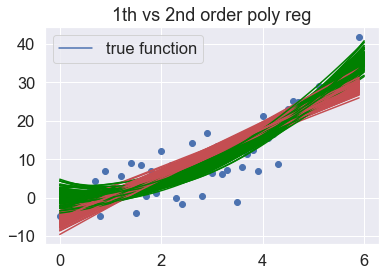

In [381]:
plt.scatter(x, y_noise, marker='o')
plt.plot(x, y, '-b', label ='true function')
for i in np.arange(100):
    x = np.arange(0,6,0.1) #Make X
    y_noise, y = simulate(x) #Calc y and y_noise
    y_pred = lin_reg(x,y_noise) #Lin req
    plt.plot(x,y_pred, "-r")
    #Quad fit
    mymodel = np.poly1d(np.polyfit(x,y_noise,2))
    myline = np.linspace(0,6,60)
    plt.plot(myline, mymodel(myline), color = "green")
plt.legend()
plt.title("1th vs 2nd order poly reg")
plt.show()

    iii. create a __new__ figure, `plt.figure`, and plot the quadratic and the fifth-order fits (colour them appropriately); highlight the true value for $x_0=3$. From the graphics alone, judge which fit has the highest bias and which has the highest variance for $x_0$  


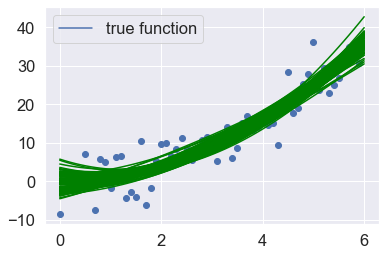

In [382]:
plt.scatter(x, y_noise, marker='o')
plt.plot(x, y, '-b', label ='true function')
for i in np.arange(100):
    x = np.arange(0,6,0.1) #Make X
    y_noise, y = simulate(x) #Calc y and y_noise
    #Quad fit
    mymodel = np.poly1d(np.polyfit(x,y_noise,2))
    myline = np.linspace(0,6,60)
    plt.plot(myline, mymodel(myline), color = "green")

plt.legend(ncol = 2)
plt.show()

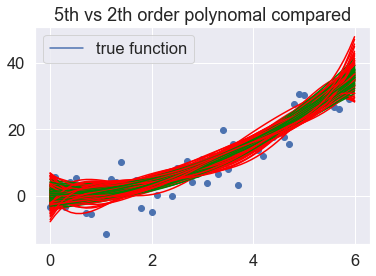

In [383]:
plt.scatter(x, y_noise, marker='o')
plt.plot(x, y, '-b', label ='true function')
for i in np.arange(100):
    x = np.arange(0,6,0.1) #Make X
    y_noise, y = simulate(x) #Calc y and y_noise
    #Quad fit
    mymodel = np.poly1d(np.polyfit(x,y_noise,2))
    myline = np.linspace(0,6,60)
    plt.plot(myline, mymodel(myline), color = "green")
    #fifth fit
    mymodel2 = np.poly1d(np.polyfit(x,y_noise,5))
    myline2 = np.linspace(0,6,60)
    plt.plot(myline2, mymodel2(myline2), color = "red")

plt.legend(ncol = 2)
plt.title("5th vs 2th order polynomal compared")
plt.show()

    iv. estimate the __bias__ and __variance__ at $x_0$ for the linear, the quadratic and the fifth-order fits (the expected value $E[\hat{f}(x_0)] - f(x_0)$ is found by taking the mean of all the simulated, $\hat{f}(x_0)$, differences) 

In [437]:
y = sqaure_input(x)
print('bias lin fit ABS:', sum(abs(y_pred - y))/len(y))
print('bias 2nd fit ABS:',sum(abs(mymodel(myline) - y))/len(y))
print('bias 5th fit ABS:', sum(abs(mymodel2(myline2) - y))/len(y))

print('bias lin fit:', sum(y_pred - y)/len(y))
print('bias 2nd fit:',sum(mymodel(myline) - y)/len(y))
print('bias 5th fit:', sum(mymodel2(myline2) - y)/len(y))



bias lin fit ABS: 2.3222327136245586
bias 2nd fit ABS: 1.147591962676873
bias 5th fit ABS: 1.8038596077973164
bias lin fit: 0.06340831430680757
bias 2nd fit: 1.147591962676873
bias 5th fit: 1.27719956091745


for x = x0 take all y-values (their sigma/spread) = variance. 
for x = x0 take all y-values and differences between true function y. (mean) = bias.

 
    v. show how the __squared bias__ and the __variance__ is related to the complexity of the fitted models  


    vi. simulate __epsilon__: `epsilon = np.random.normal(scale=5, size=100)`. Based on your simulated values of __bias, variance and epsilon__, what is the __Mean Squared Error__ for each of the three fits? Which fit is better according to this measure? 


# EXERCISE 2: Fitting training data and applying it to test sets with and without regularization

All references to pages are made to this book:
Raschka, S., 2015. Python Machine Learning. Packt Publishing Ltd.  

## 1) Import the housing dataset using the upper chunk of code from p. 280 
    i. and define the correlation matrix `cm` as done on p. 284  


In [384]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-'
    'book-2nd-edition/master/code/ch10/housing.data.txt',
    header=None,
    sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
    'NOX', 'RM', 'AGE', 'DIS', 'RAD',
    'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


/Users/sigurd/opt/anaconda3/envs/method3/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


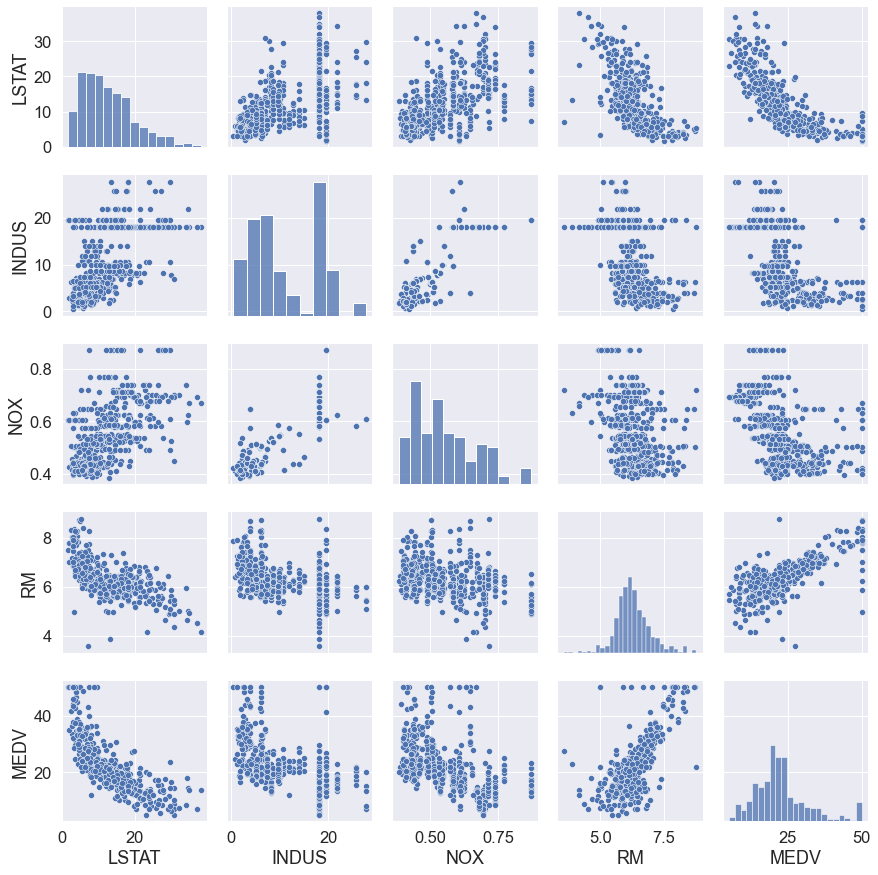

In [385]:
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

Above plot gives a good intuition about the distribution of our data and the realtionship between a few selected variables. If we wanna get a concise estimate of the relation/correlation between 2 variables a correlation matrix would do better as illustrated below. However, this plot also informs us of possible suitable linear predictors for our dependent variable MEDV. 

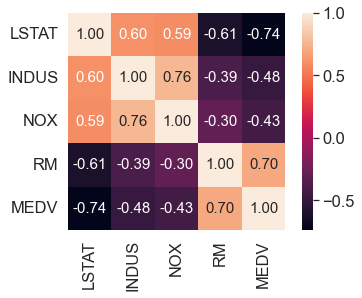

In [386]:

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

    ii. based on this matrix, do you expect collinearity can be an issue if we run multiple linear regression  by fitting MEDV on LSTAT, INDUS, NOX and RM?  


Yes there are several predictors which has a correlation score well above |0.5|. Not that |0.5| is a cutpoint for troublesome correlation between independent variable. It is however a good indication that trouble could arise. 

### 2) Fit MEDV on  LSTAT, INDUS, NOX and RM (standardize all five variables by using `StandardScaler.fit_transform`, (`from sklearn.preprocessing import StandardScaler`) by doing multiple linear regression using `LinearRegressionGD` as defined on pp. 285-286
    i. how much does the solution improve in terms of the cost function if you go through 40 iterations instead of the default of 20 iterations?  


In [487]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return self.net_input(X)

In [488]:
y = df['MEDV'].values
X = df[['LSTAT','INDUS','NOX','RM']].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

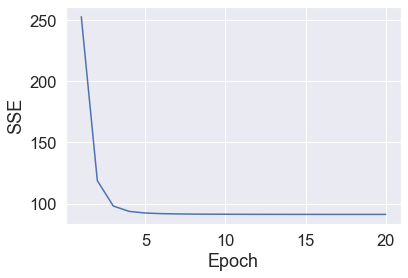

Cost/RSS: 91.0746061473639


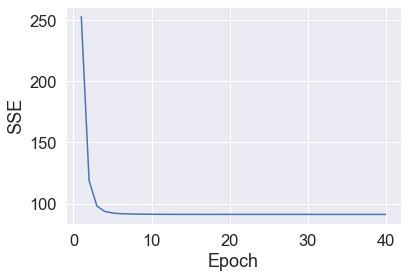

Cost/RSS: 91.0692083318594


In [489]:
def plot_LinRegGD(n):
    lr = LinearRegressionGD(n_iter= n)
    lr.fit(X_std, y_std)
    plt.plot(range(1, lr.n_iter+1), lr.cost_)
    plt.ylabel('SSE')
    plt.xlabel('Epoch')
    plt.show()
    print("Cost/RSS:", lr.cost_[-1])

plot_LinRegGD(20)
plot_LinRegGD(40)

It is almost impossible to visually see a difference in terms of cost of n_iter = 20 or 40. Numerically the difference is also extremely small... 91.0745 - 91.0692 = 0.0053. 

    ii. how does the residual sum of squares based on the analytic solution (Ordinary Least Squares) compare to the cost after 40 iterations?


In [446]:
linReg = LinearRegression()
linReg.fit(X_std, y_std)
y_std_hat = linReg.predict(X_std)

print('RSS for OLS:',sum((y_std - y_std_hat)**2))


RSS for OLS: 182.13837658669692


The RSS for the OLS is much higher compared to the linRegGD method with 40 epochs. 

    iii. Bonus question: how many iterations do you need before the Ordinary Least Squares and the Gradient Descent solutions result in numerically identical residual sums of squares?  


In [495]:

def LinRegGD(n):
    lr = LinearRegressionGD(n_iter= n)
    lr.fit(X_std, y_std)
    #print("Cost/RSS:", lr.cost_[-1])
    return lr.cost_[-1]

LinRegGD(10)

91.19984762931108

In [521]:
n = 0
while True:
    n = n + 1
    RSS = LinRegGD(n)
    if RSS <= 182:
        print('Terminated...','Number of epochs:' ,n)
        print('RSS:', RSS)
        break
    else:
        print(n)
        continue



1
Terminated... Number of epochs: 2
RSS: 118.75570114840575


### 3) Build your own cross-validator function. This function should randomly split the data into $k$ equally sized folds (see figure p. 176) (see the code chunk associated with exercise 2.3). It should also return the Mean Squared Error for each of the folds
    i. Cross-validate the fits of your model from Exercise 2.2. Run 11 folds and run 500 iterations for each fit  


    ii. What is the mean of the mean squared errors over all 11 folds?  


### 4) Now, we will do a Ridge Regression. Use `Ridge` (see code chunk associated with Exercise 2.4) to find the optimal `alpha` parameter ($\lambda$)


    i. Find the _MSE_ (the mean of the _MSE's_ associated with each fold) associated with a reasonable range of `alpha` values (you need to find the lambda that results in the minimum _MSE_)  


    ii. Plot the _MSE_ as a function of `alpha` ($\lambda$). Make sure to include an _MSE_ for `alpha=0` as well  


    iii. Find the _MSE_ for the optimal `alpha`, compare its _MSE_ to that of the OLS regression


    iv. Do the same steps for Lasso Regression `Lasso`  (2.4.i.-2.4.iii.)


    v. Describe the differences between these three models, (the optimal Lasso, the optimal Ridge and the OLS)
